In [44]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_excel('data/data.xlsx', 
                   header=None,
                   names=[f'feature{i}' for i in range(1,6)])

In [22]:
df.head()

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,NaN,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,NaN,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,NaN


###  3. Missing Values Analysis

Usually missing data problems areclassified  into three categories. We'll try to categorize the missing values in our data.

![Missin Values Types](https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1)

In [23]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values Amount ', 1 : 'Percent of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Percent of Total Values', ascending=False).round(1)

    return mis_val_table_ren_columns

In [24]:
missing_values_table(df)

,Missing Values Amount,Percent of Total Values
feature1,5,10.0
feature3,5,10.0
feature5,5,10.0
feature2,4,8.0
feature4,3,6.0


#### Tools

! For better understanding of missing values patterns, we will use the [missingno](https://github.com/ResidentMario/missingno) library which allows us to get a quick visual summary of the completeness of our data.

#### Visualization location of the missing data

<AxesSubplot:>

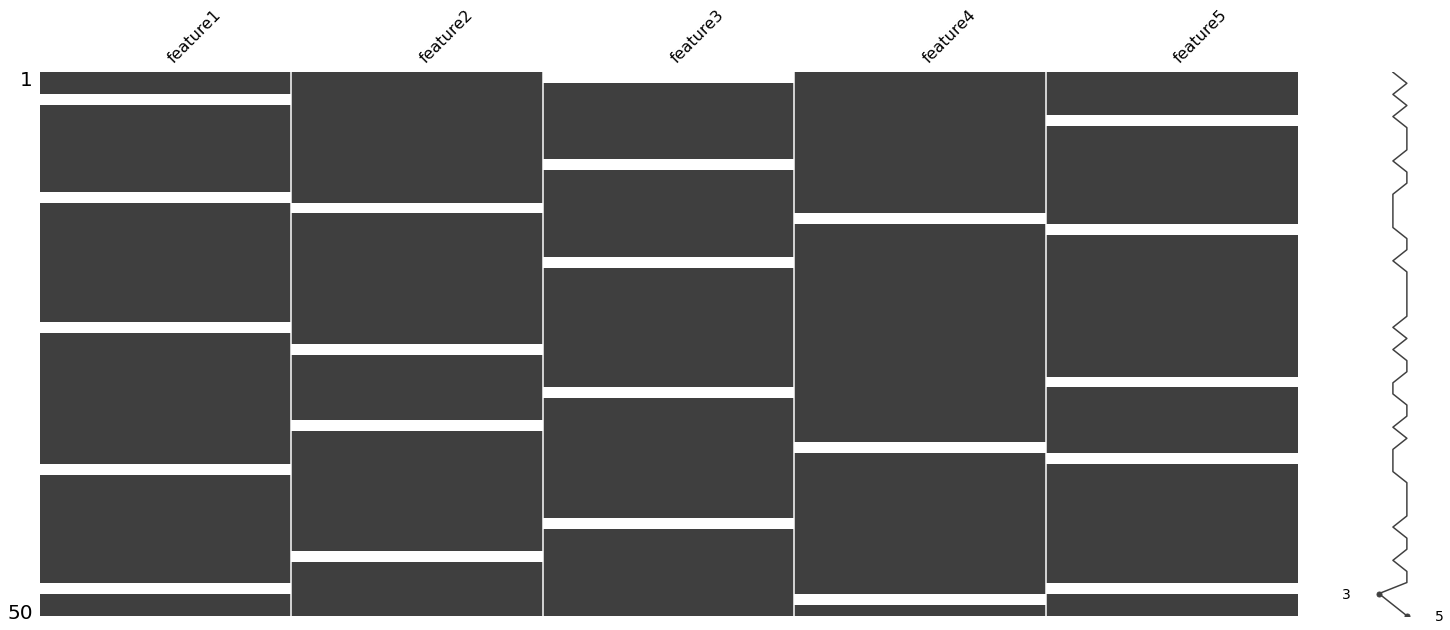

In [34]:
msno.matrix(df)

#### Correlation of features missingness. 
It represents how strongly the presence or absence of one variable affects the presence of another

<AxesSubplot:>

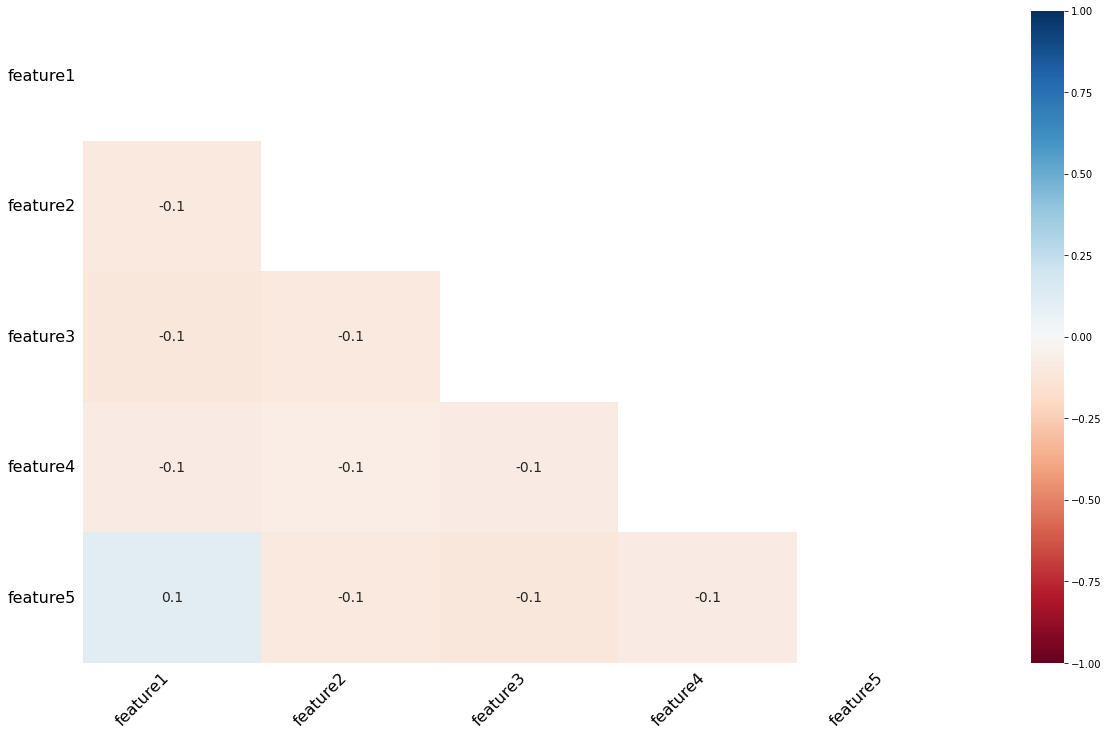

In [27]:
msno.heatmap(df)

The heatmap shows that there are no strong correlations between missing values of different features. The low correlations indicate that the data are Missing at Random (MAR).

#### Features Dendrogram (Hierarchy Clusterization)

The dendrogram allows you to  revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<AxesSubplot:>

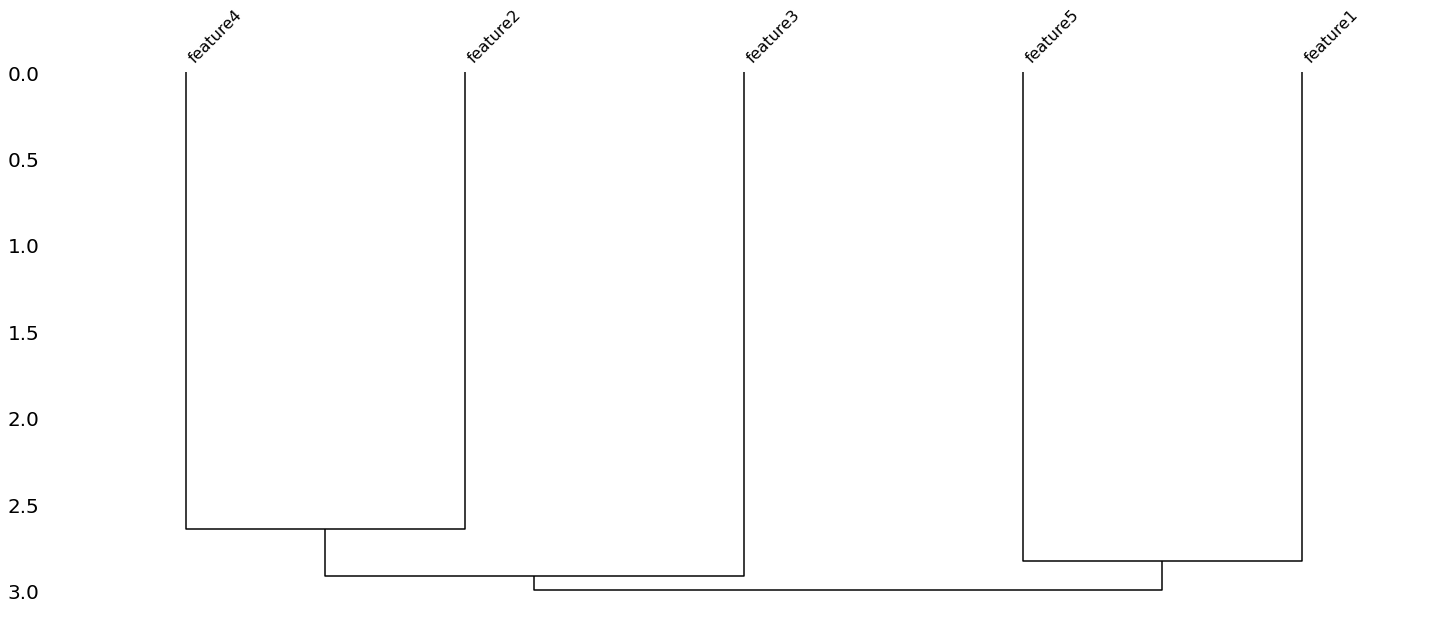

In [28]:
msno.dendrogram(df)

As the missingno documentaion states:
>Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they >might always both be filled or both empty, and so on(missingno documentation)

So the conclusion after these analysis charts is that there are no strong correlation between the missingness in features. First of all, due to small amount of missing values.

#### Feature Correlation heatmap

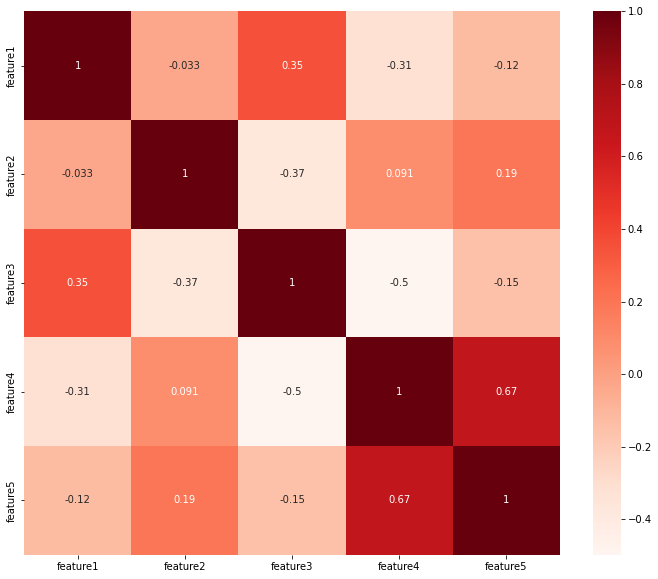

In [45]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

By the way, some features itself have strong enough correlation. For example:
- feature4 and feature5 have strong positive correlation with 0.67 value
- feature4 and feature3 in contrast have negative correlation with 0.5 value

###  3. Imputation Methods

There are a lot of missing data imputation scenarios. In this lab the following methods will be implemented:
1. Basic Data Imputatuion Techniques
    - With a constant value 
    - With a descriptive statistics (mean, median)
2. Advanced Data Imputatuion Techniques
    - KNN Imputater
    - MissForest Imputer

/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='feature1', ylabel='Density'>

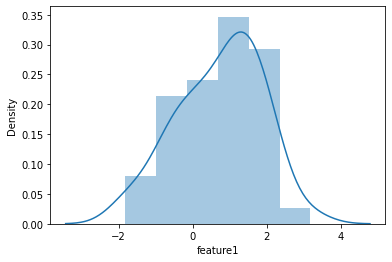

In [47]:
sns.distplot(df.feature1)